# Introduction

* This content has stroke_prediction dataset,

* The stroke prediction data set trying to guess to stroke status in dependent some features where features below.

* Using Logistic Regression method the method that are basic of artifical neural networks and good performs if data has a binary labels.

* Using seaborn library for visualazation.

### Features 

* id
* gender 
* age
* hypertension
* heart_disease 
* ever_married 
* work_type 
* Residence_type 
* avg_glucose_level
* bmi 
* smoking_status
* stroke(Label)

### Content 

* Imported data
* Load to data
* Tried to understand data 
* Control the missing value 
* Feature engineering
  * Correlation numerical values
  * Smoking status by gender type and relation with stroke 
  * Smoking status by work type relation with stroke
  * Smoking status by age mean relation with stroke
  * Smoking status by avg_glucose_level mean relation with stroke
  * Smoking status by bmi mean relation with stroke
  * Genaral visualization for that we did feature engineering
  * Density map of numerical values(hypertension; age and bmi level relation)
* Examined to median values in numerical values 
* Control the outlier values for numerical values 
* Filling the missing value  
* Obtained training and testing variables for learning proceses 
  * Encoding catagorical features with label encoder for learning processes
* Implement the PCA(Principle Component Analysis) data and 2D visualization
* Learning time!
  * Naive Bayes Classification
  * K neirest neighbor Classification
  * Linear SVM Classification
  * Decision Tree Classification
  * Random Forest Classification
* Comparing Learning algorithms performs
  * Visualization part
  * Confussion matrixes

## Imported libraries

In [107]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')
import warnings 
warnings.filterwarnings('ignore')
from collections import Counter

* We want use style dark grid 
* Ignoring warnings 
* We will use Counter function for outlier step for counting in list values

## Load the data 

In [108]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Tried to understand data 

In [110]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Control the missing value

In [111]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

* We can see 201 value null elements in 'bmi' feature we should fill the values with availaible median value

## Feature engineering

### Correlation numerical values

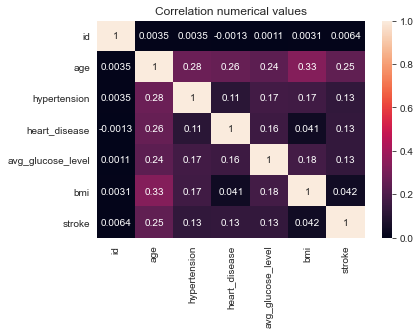

In [112]:
sns.heatmap(data.corr() , annot = True)
plt.title('Correlation numerical values')
plt.show()

Comment : The features mainly that has no correlation enough for processes

### Smoking status by gender type and relation with stroke 

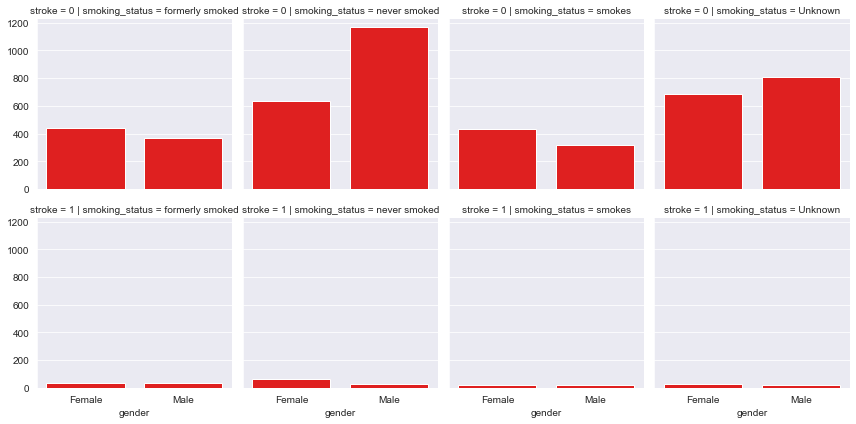

In [113]:
g = sns.FacetGrid(data , row = 'stroke' , col = 'smoking_status')
g.map(sns.countplot , 'gender' , color = 'red')
plt.show()

### Smoking status by work type relation with stroke status

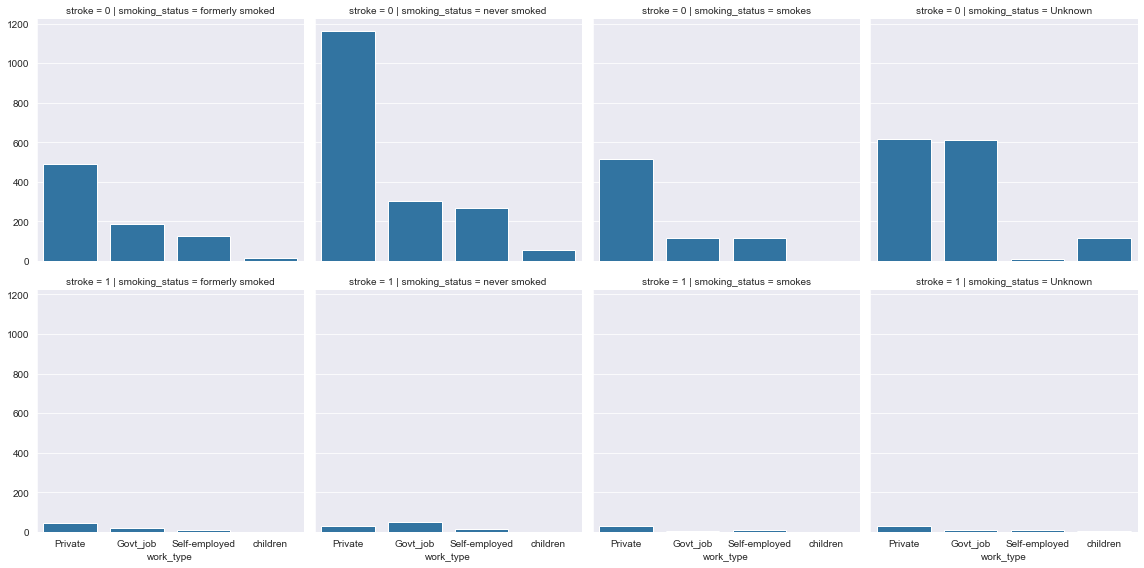

In [114]:
g = sns.FacetGrid(data , row = 'stroke' , col = 'smoking_status' , size = 4)
g.map(sns.countplot , 'work_type')
plt.show()

### Smoking status by age mean relation with stroke 

In [115]:
smoking_status = data['smoking_status'].unique()
stroke_status = data['stroke'].unique()

In [116]:
# for saving mean values by smoking status
age_mean_smoking_status_stroke_1 = []
age_mean_smoking_status_stroke_0 = []

for j in smoking_status:
    age_mean_smoking_status_stroke_1.append(data.age[(data['smoking_status'] == '{}'.format(j)) & (data['stroke'] == 1)].mean())
    age_mean_smoking_status_stroke_0.append(data.age[(data['smoking_status'] == '{}'.format(j)) & (data['stroke'] == 0)].mean())   

print('Stroke status 1 :' , age_mean_smoking_status_stroke_1)
print('Stroke status 0 :' , age_mean_smoking_status_stroke_0)

# concat the array for dataframe that we will create need to label 
means_age = np.concatenate((age_mean_smoking_status_stroke_1 , age_mean_smoking_status_stroke_0))
print('means concat : ' , means_age)

smoking_status_concat = np.concatenate((smoking_status, smoking_status))
print('smoking status concat : ' , smoking_status_concat)

Stroke status 1 : [68.62857142857143, 70.31111111111112, 62.80952380952381, 65.83659574468085]
Stroke status 0 : [53.75337423312883, 45.567702552719204, 46.21285140562249, 29.11201068804278]
means concat :  [68.62857143 70.31111111 62.80952381 65.83659574 53.75337423 45.56770255
 46.21285141 29.11201069]
smoking status concat :  ['formerly smoked' 'never smoked' 'smokes' 'Unknown' 'formerly smoked'
 'never smoked' 'smokes' 'Unknown']


In [117]:
# our labels 
stroke_status = [1 , 1 , 1 ,1 , 0 , 0 , 0 , 0]

In [118]:
# creating new dataframe 
df_agemean_smoking_status_stroke = pd.DataFrame({'Smoking status' : smoking_status_concat , 'Age means' : means_age , 
                                                 'Stroke status' : stroke_status})
df_agemean_smoking_status_stroke

,Smoking status,Age means,Stroke status
0,formerly smoked,68.628571,1
1,never smoked,70.311111,1
2,smokes,62.809524,1
3,Unknown,65.836596,1
4,formerly smoked,53.753374,0
5,never smoked,45.567703,0
6,smokes,46.212851,0
7,Unknown,29.112011,0


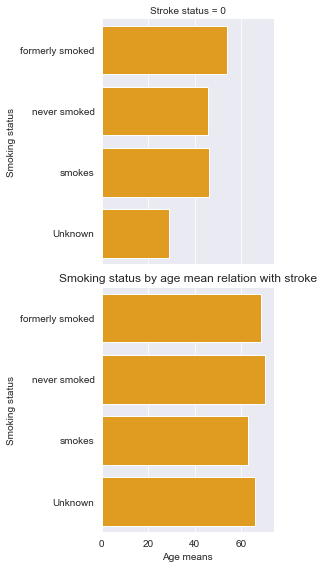

In [119]:
g = sns.FacetGrid(df_agemean_smoking_status_stroke , row = 'Stroke status' , size = 4)
g.map(sns.barplot , 'Age means', 'Smoking status' , color = 'orange')
plt.title('Smoking status by age mean relation with stroke')
plt.show()

### Smoking status by avg_glucose_level mean relation with stroke

In [120]:
# for saving mean values by smoking status
avg_mean_smoking_status_stroke_1 = []
avg_mean_smoking_status_stroke_0 = []

for j in smoking_status:
    avg_mean_smoking_status_stroke_1.append(data.avg_glucose_level[(data['smoking_status'] == '{}'.format(j)) & (data['stroke'] == 1)].mean())
    avg_mean_smoking_status_stroke_0.append(data.avg_glucose_level[(data['smoking_status'] == '{}'.format(j)) & (data['stroke'] == 0)].mean())   

print('Stroke status 1 :' , avg_mean_smoking_status_stroke_1)
print('Stroke status 0 :' , avg_mean_smoking_status_stroke_0)

# concat the array for dataframe that we will create need to label 
means_avg = np.concatenate((avg_mean_smoking_status_stroke_1 , avg_mean_smoking_status_stroke_0))
print('means concat : ' , means_avg)


Stroke status 1 : [132.80685714285713, 132.9072222222223, 139.98785714285717, 124.80893617021279]
Stroke status 0 : [111.17509202453975, 106.29204217536088, 106.21990629183395, 98.81012692050778]
means concat :  [132.80685714 132.90722222 139.98785714 124.80893617 111.17509202
 106.29204218 106.21990629  98.81012692]


In [121]:
# creating new dataframe 
df_avgmean_smoking_status_stroke = pd.DataFrame({'Smoking status' : smoking_status_concat , 'Avg glucose level means' : means_avg , 
                                                 'Stroke status' : stroke_status})
df_avgmean_smoking_status_stroke

,Smoking status,Avg glucose level means,Stroke status
0,formerly smoked,132.806857,1
1,never smoked,132.907222,1
2,smokes,139.987857,1
3,Unknown,124.808936,1
4,formerly smoked,111.175092,0
5,never smoked,106.292042,0
6,smokes,106.219906,0
7,Unknown,98.810127,0


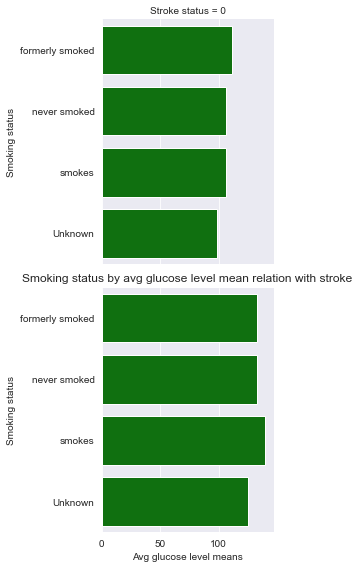

In [122]:
g = sns.FacetGrid(df_avgmean_smoking_status_stroke , row = 'Stroke status' , size = 4)
g.map(sns.barplot , 'Avg glucose level means', 'Smoking status' , color = 'green')
plt.title('Smoking status by avg glucose level mean relation with stroke')
plt.show()

### Smoking status by bmi mean relation with stroke

In [123]:
# for saving mean values by smoking status
bmi_mean_smoking_status_stroke_1 = []
bmi_mean_smoking_status_stroke_0 = []

for j in smoking_status:
    bmi_mean_smoking_status_stroke_1.append(data.bmi[(data['smoking_status'] == '{}'.format(j)) & (data['stroke'] == 1)].mean())
    bmi_mean_smoking_status_stroke_0.append(data.bmi[(data['smoking_status'] == '{}'.format(j)) & (data['stroke'] == 0)].mean())   

print('Stroke status 1 :' , bmi_mean_smoking_status_stroke_1)
print('Stroke status 0 :' , bmi_mean_smoking_status_stroke_0)

# concat the array for dataframe that we will create need to label 
means_bmi = np.concatenate((bmi_mean_smoking_status_stroke_1 , bmi_mean_smoking_status_stroke_0))
print('means concat : ' , means_bmi)

Stroke status 1 : [31.0140350877193, 30.43928571428572, 30.579487179487177, 29.351724137931036]
Stroke status 0 : [30.727692307692326, 29.96085972850679, 30.541547277936935, 25.592847317744145]
means concat :  [31.01403509 30.43928571 30.57948718 29.35172414 30.72769231 29.96085973
 30.54154728 25.59284732]


In [124]:
# creating new dataframe 
df_bmimean_smoking_status_stroke = pd.DataFrame({'Smoking status' : smoking_status_concat , 'Bmi level means' : means_bmi , 
                                                 'Stroke status' : stroke_status})
df_bmimean_smoking_status_stroke

,Smoking status,Bmi level means,Stroke status
0,formerly smoked,31.014035,1
1,never smoked,30.439286,1
2,smokes,30.579487,1
3,Unknown,29.351724,1
4,formerly smoked,30.727692,0
5,never smoked,29.960860,0
6,smokes,30.541547,0
7,Unknown,25.592847,0


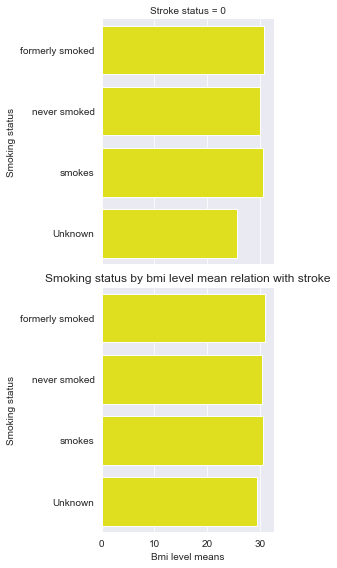

In [125]:
g = sns.FacetGrid(df_bmimean_smoking_status_stroke , row = 'Stroke status' , size = 4)
g.map(sns.barplot , 'Bmi level means', 'Smoking status' , color = 'yellow')
plt.title('Smoking status by bmi level mean relation with stroke')
plt.show()

### Genaral visualization for that we did feature engineering

In [126]:
# droppin the labels two data frame 
df_agemean_smoking_status_stroke.drop('Stroke status' , axis = 1 , inplace = True)
df_avgmean_smoking_status_stroke.drop('Stroke status' , axis = 1 , inplace = True)

df_avgmean_smoking_status_stroke.drop('Smoking status' , axis = 1 , inplace = True)
df_bmimean_smoking_status_stroke.drop('Smoking status' , axis = 1 , inplace = True)

In [127]:
# concat the dataframes 
df_general = pd.concat([df_agemean_smoking_status_stroke , df_avgmean_smoking_status_stroke , df_bmimean_smoking_status_stroke],
                      axis = 1)

In [128]:
df_general

,Smoking status,Age means,Avg glucose level means,Bmi level means,Stroke status
0,formerly smoked,68.628571,132.806857,31.014035,1
1,never smoked,70.311111,132.907222,30.439286,1
2,smokes,62.809524,139.987857,30.579487,1
3,Unknown,65.836596,124.808936,29.351724,1
4,formerly smoked,53.753374,111.175092,30.727692,0
5,never smoked,45.567703,106.292042,29.960860,0
6,smokes,46.212851,106.219906,30.541547,0
7,Unknown,29.112011,98.810127,25.592847,0


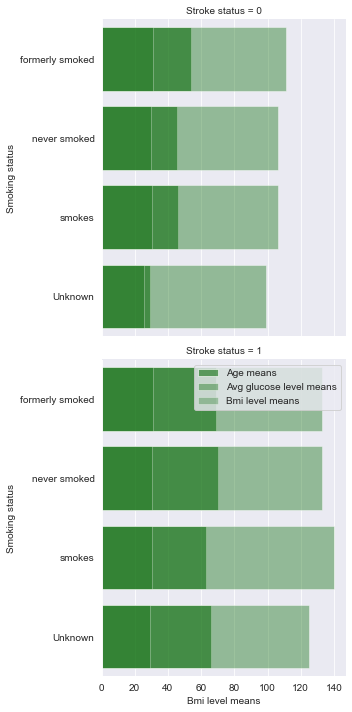

In [129]:
g = sns.FacetGrid(df_general , row = 'Stroke status' , size = 5)
g.map(sns.barplot , 'Age means' , 'Smoking status' , label = 'Age means' , color = 'green' , alpha = 0.6)
g.map(sns.barplot , 'Avg glucose level means' , 'Smoking status' , label = 'Avg glucose level means' , color = 'green' , alpha = 0.4)
g.map(sns.barplot , 'Bmi level means' , 'Smoking status' , label = 'Bmi level means' , color = 'green' , alpha = 0.3)
plt.legend()
plt.show()

### Density map of numerical values

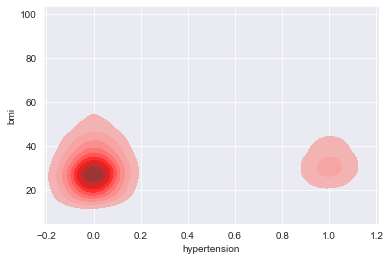

In [130]:
# hypertension and bmi relation
sns.kdeplot(x = 'hypertension' , y = 'bmi' , data = data , shade = True , color = 'red')
plt.show()

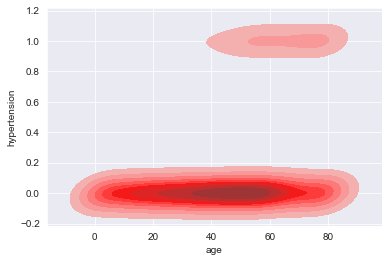

In [131]:
# hypertension and age relation
sns.kdeplot(x = 'age' , y = 'hypertension' , data = data , shade = True , color = 'red')
plt.show()

* We can see if hypertension is 1 actually the people have ever have a hypertension problem the age rises.

## Examined to median values in numerical values

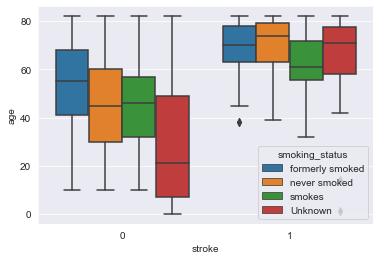

In [132]:
sns.boxplot(x = 'stroke' , y = 'age' , hue = 'smoking_status' , data = data)
plt.show()

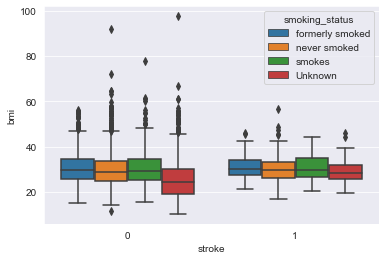

In [133]:
sns.boxplot(x = 'stroke' , y = 'bmi' , hue = 'smoking_status' , data = data)
plt.show()

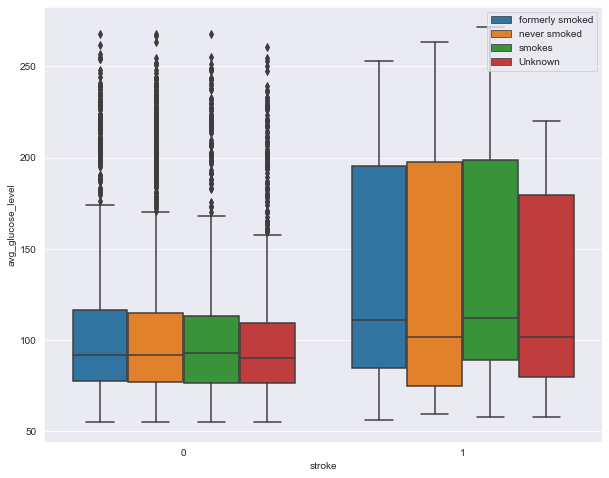

In [134]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize = fig_dims)
sns.boxplot(x = 'stroke' , y = 'avg_glucose_level' , hue = 'smoking_status' , ax = ax , data = data)
plt.legend(loc='upper right')
plt.show()

* We can see these plots with outlier values

## Control the outlier values for numerical values

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [136]:
# create a two list for store the indices and counting indices 
outlier_indices = []
outlier_values = []

In [137]:
# detecth the outliers 
def outlier_detecth(df , features):
    
    for i in features:
    
        # finding first quantie 
    
        Q1 = np.percentile(data[i] , 25)
        print('First quantie : ' , Q1)
    
        # finding third quantie 
    
        Q3 = np.percentile(data[i] , 75)
        print('Third quantie : ' , Q3)
    
        # calculate the IQR 
    
        IQR = Q3 - Q1
        print('The IQR : ' , IQR)
    
        # determine the threshold value 
    
        threshold_value = IQR * 1.5
        print('The outlier threshold value : ' , threshold_value )
    
        # detecth the outlier values 
    
        outlier_list = data[(data[i] < Q1 - threshold_value) | (data[i] > Q3 + threshold_value)].index
        
        # calculate the outlier values 
        
        outlier_indices.extend(outlier_list)
    
    outlier_values = Counter(outlier_indices)
    
    return outlier_values

In [138]:
outlier_values = outlier_detecth(data , ['avg_glucose_level' , 'age'])

First quantie :  77.24499999999999
Third quantie :  114.09
The IQR :  36.84500000000001
The outlier threshold value :  55.26750000000002
First quantie :  25.0
Third quantie :  61.0
The IQR :  36.0
The outlier threshold value :  54.0


In [139]:
outlier_values

Counter({0: 1,
         1: 1,
         3: 1,
         4: 1,
         5: 1,
         13: 1,
         14: 1,
         16: 1,
         17: 1,
         19: 1,
         20: 1,
         21: 1,
         22: 1,
         23: 1,
         27: 1,
         28: 1,
         29: 1,
         30: 1,
         32: 1,
         33: 1,
         36: 1,
         44: 1,
         45: 1,
         54: 1,
         55: 1,
         57: 1,
         58: 1,
         59: 1,
         60: 1,
         66: 1,
         71: 1,
         73: 1,
         76: 1,
         90: 1,
         95: 1,
         97: 1,
         101: 1,
         102: 1,
         107: 1,
         113: 1,
         115: 1,
         122: 1,
         123: 1,
         124: 1,
         128: 1,
         130: 1,
         132: 1,
         134: 1,
         135: 1,
         137: 1,
         138: 1,
         139: 1,
         144: 1,
         149: 1,
         150: 1,
         151: 1,
         155: 1,
         157: 1,
         158: 1,
         163: 1,
         175: 1,
    

* The outlier values in two features that are age and avg_glucose_level.
* We can see the indices that has outlier numbers and the datas has no more that two outlier values.
* Finally we dont have to drop outlier values because it is'nt necessary just one outlier in any indices.

## Filling the missing value

In [140]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

* The data has null values where columns is only 'bmi' 

In [141]:
# detecth null values in data
data[data['bmi'].isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


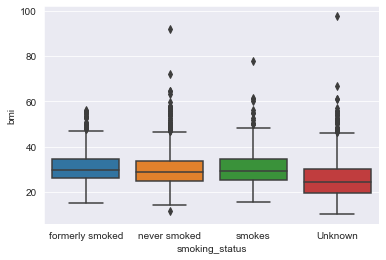

In [142]:
sns.boxplot(x = 'smoking_status' , y = 'bmi' , data = data)
plt.show()

* We can't filling to in dependent of smoking_status
* There is no diffrences bmi value with smoking status.

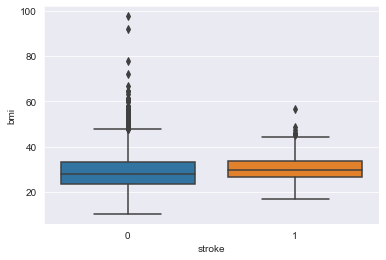

In [143]:
sns.boxplot(x = 'stroke' , y = 'bmi' , data = data)
plt.show()

* We can't filling to in dependent of stroke status
* There is no diffrences bmi value with stroke status

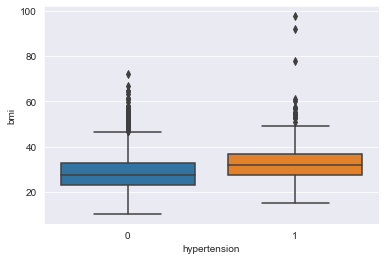

In [144]:
sns.boxplot(x = 'hypertension' , y = 'bmi' , data = data)
plt.show()

* We can filling with hypertension median values
* There is a diffrence and we can use this that we want to 

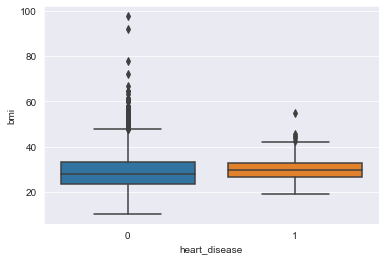

In [145]:
sns.boxplot(x = 'heart_disease' , y = 'bmi' , data = data)
plt.show()

* We can't filling to in dependent of hearth disase status
* There is no diffrences bmi value with hearth disase status

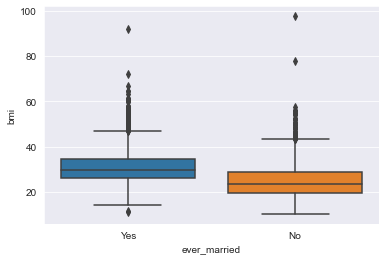

In [146]:
sns.boxplot(x = 'ever_married' , y = 'bmi' , data = data)
plt.show()

* We can filling with ever_married median values
* There is a diffrence and we can use this that we want to 

#### So finally we can use features that are hypertension and ever married, when we will fill the NaN values in bmi features

In [147]:
# store the null values's indexes
indexes_null = data[data['bmi'].isnull()].index

In [148]:
indexes_null

Int64Index([   1,    8,   13,   19,   27,   29,   43,   46,   50,   51,
            ...
            4790, 4921, 4934, 4949, 4984, 5039, 5048, 5093, 5099, 5105],
           dtype='int64', length=201)

In [149]:
bmi_pred = []
for i in indexes_null:
    # calculate the medians, we have indexes that null values in bmi feature 
    # bmi indexes where are null indexes in bmi feauture that is i 
    # and filling with that indexes where are hypertension and ever_maried median 
    bmi_pred = data['bmi'][((data['hypertension'] == data.iloc[i]['hypertension']) & 
                            (data['ever_married'] == data.iloc[i]['ever_married']))].median()
    # filling processes
    
    data['bmi'].loc[i] = bmi_pred

In [150]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Obtained training and testing variables for learning proceses

In [151]:
# decleration variables for training and testing processes 
X = data.drop(['stroke' , 'id'] , axis = 1).values
y = data.stroke

In [152]:
X

array([['Male', 67.0, 0, ..., 228.69, 36.6, 'formerly smoked'],
       ['Female', 61.0, 0, ..., 202.21, 29.4, 'never smoked'],
       ['Male', 80.0, 0, ..., 105.92, 32.5, 'never smoked'],
       ...,
       ['Female', 35.0, 0, ..., 82.99, 30.6, 'never smoked'],
       ['Male', 51.0, 0, ..., 166.29, 25.6, 'formerly smoked'],
       ['Female', 44.0, 0, ..., 85.28, 26.2, 'Unknown']], dtype=object)

### Encoding catagorical features with label encoder for learning processes

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


* We should encoding feature where dtype is 'object' because learning processes need to be numerical variables

In [154]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0]) # For gender 
X[:,4] = le.fit_transform(X[:,4]) # For married status 
X[:,5] = le.fit_transform(X[:,5]) # For work type
X[:,6] = le.fit_transform(X[:,6]) # For residance type
X[:,9] = le.fit_transform(X[:,9]) # For smoking status 

In [155]:
# train and test splitting 
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

# Implement the PCA(Principle Component Analysis) data and 2D visualization

In [156]:
from sklearn.decomposition import PCA
z = data.drop(['stroke' , 'id'], axis = 1).values

# Encoding
z[:,0] = le.fit_transform(z[:,0]) # For gender 
z[:,4] = le.fit_transform(z[:,4]) # For married status 
z[:,5] = le.fit_transform(z[:,5]) # For work type
z[:,6] = le.fit_transform(z[:,6]) # For residance type
z[:,9] = le.fit_transform(z[:,9]) # For smoking status 

pca = PCA(n_components = 2, whiten = True) # we want two component for visialization
pca.fit(z) # detecth the our pca components

# conver the 2d 
z_pca = pca.transform(z)

# analyz the pca perform
print('The variances are : {}'.format(pca.explained_variance_ratio_))
print('The variance score is : {}'.format(sum(pca.explained_variance_ratio_)))

The variances are : [0.79650051 0.18268965]
The variance score is : 0.9791901609119906


* The variance score is very good the score that means our component too similaraty has with our real data.

In [160]:
# Create a new dataframe for pca visulization
pca_2d_df = data.drop(['id'], axis = 1)
pca_2d_df

# new data frame encoding
pca_2d_df.iloc[:,0] = le.fit_transform(pca_2d_df.iloc[:,0]) # For gender 
pca_2d_df.iloc[:,4] = le.fit_transform(pca_2d_df.iloc[:,4]) # For married status 
pca_2d_df.iloc[:,5] = le.fit_transform(pca_2d_df.iloc[:,5]) # For work type
pca_2d_df.iloc[:,6] = le.fit_transform(pca_2d_df.iloc[:,6]) # For residance type
pca_2d_df.iloc[:,9] = le.fit_transform(pca_2d_df.iloc[:,9]) # For smoking status 

# add the pca components
pca_2d_df['p1'] = z_pca[:,0]
pca_2d_df['p2'] = z_pca[:,1]

pca_2d_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,p1,p2
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1,2.732301,-0.228539
1,0,61.0,0,0,1,3,0,202.21,29.4,2,1,2.134927,-0.111428
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1,0.121458,-1.668146
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1,1.429185,0.176928
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1,1.584857,-1.090511
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,31.8,2,0,-0.357890,-1.823192
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0,0.546626,-1.613215
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0,-0.526577,0.193932
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0,1.322731,0.099070


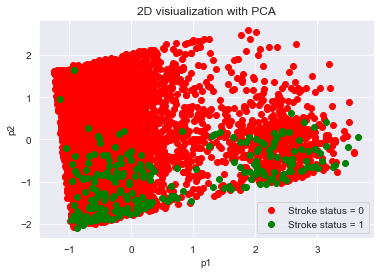

In [158]:
# create a color list for classification
color = ['red' , 'green']
labels = ['Stroke status = 0', 'Stroke status = 1']
for i, j, k in zip(color, labels, range(0,2)):
    plt.scatter(pca_2d_df.p1[pca_2d_df['stroke'] == k], 
                pca_2d_df.p2[pca_2d_df['stroke'] == k], 
                label = '{}'.format(j), color = i)

plt.legend(loc = 'best')
plt.xlabel('p1')
plt.ylabel('p2')
plt.title('2D visiualization with PCA')
plt.show()

* As we can see the density of data by PCA components
* Generally, Stroke status 0's labels density involve to Stroke status 1 labels.

## Learning time!

### Logistic Regression

In [159]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 10)

# Cross validation and create dict for hyperparameters
from sklearn.model_selection import GridSearchCV

# hyperparameters 
grid_lr = {'C' : [0.01 , 1 , 15]}

# finding the best parameters
cv = GridSearchCV(lr , grid_lr , cv = 10)
cv.fit(X_train, y_train)
print('The best C value for training process: {}'.format(cv.best_params_))
print('The best score validation score : {}'.format(cv.best_score_))

# Testing process
lr.fit(X_train, y_train)
print('Logistic Regression score : ' , lr.score(X_test , y_test))
lr_score = lr.score(X_test , y_test)

The best C value for training process: {'C': 0.01}
The best score validation score : 0.9542571551848121
Logistic Regression score :  0.9393346379647749


* The 'C' hyperparameter is specifying to regularization for overfitting and underfitting status.

### Naive Bayes Classification

In [99]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train , y_train)
print('Acuracy Naive Bayes classification : {}'.format(nb.score(X_test , y_test)))
nb_score = nb.score(X_test , y_test)

Acuracy Naive Bayes classification : 0.8679060665362035


### K neirest neighbor classification

In [161]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 16, weights = 'uniform')

# Cross validation and create dict for hyperparameters
grid_knn = {'n_neighbors': np.arange(1,30) , 'weights': ['uniform', 'distance']}
cv = GridSearchCV(knn , grid_knn, cv = 10)

# finding the best parameters 
cv.fit(X_train, y_train)
print('The bes hpyperparameters are : {}'.format(cv.best_params_))
print('The best validation score is : {}'.format(cv.best_score_))

# Testing process
knn.fit(X_train , y_train)
print('Knn score' , knn.score(X_test , y_test))
knn_score = knn.score(X_test , y_test)

The bes hpyperparameters are : {'n_neighbors': 16, 'weights': 'uniform'}
The best validation score is : 0.9542571551848121
Knn score 0.9393346379647749


* As we can see the best hyperparameters.
* The neighboors parameters decide with number of neighboors 
* weights parameters that is uniform, the datas has no special feature by distance
* weights parameters that is distance the datas has special feature by distance

### Linear SVM Classification

In [162]:
from sklearn.svm import SVC
svm = SVC(C = 15 ,random_state = 42)
svm.fit(X_train , y_train)
print('Acuracy with Linear SVM :{}'.format(svm.score(X_test , y_test)))
svm_score = svm.score(X_test , y_test)

Acuracy with Linear SVM :0.9393346379647749


### Decision Tree Classification

In [163]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini' , min_samples_leaf = 4)

# Cross validation and create dict for hyperparameters
grid_dt = {"criterion": ['gini', 'entropy'] , "min_samples_leaf" : range(1,5)}
cv = GridSearchCV(dt , grid_dt , cv = 10)
cv.fit(X_train, y_train)
print('The best criterion section is : {}'.format(cv.best_params_))
print('The best validation score is : {}'.format(cv.best_score_))

# Testing process
dt.fit(X_train , y_train)
print('Decision Tree score : ' , dt.score(X_test , y_test))
dt_score = dt.score(X_test , y_test)

The best criterion section is : {'criterion': 'gini', 'min_samples_leaf': 4}
The best validation score is : 0.9344503571599789
Decision Tree score :  0.9285714285714286


* As we can see the best hyperparameters.
* If the scores that are validation and test scores has a too diffrences we should change the 'max_depth' hyperparatemeters. The max_depth hyperparameters defaul value is infinite. 
* Gini that means basicly, choose the root that data more frequency than the other

### Random Forest Classification

In [164]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100 , random_state = 42)
rf.fit(X_train , y_train)
print('Acuracy wit Random forest :{}'.format(rf.score(X_test , y_test)))
rf_score = rf.score(X_test, y_test)

Acuracy wit Random forest :0.9393346379647749


* Random forest generally no need to hyperparameters.
* Decision tree sometimes has a overfitting and random forest block the overfitting
* There is a just important hyperparameters that is n_estimators, n_estimators is a number of decision trees

# Comparing Learning algorithms performs

## Visualization part

In [165]:
algorithms = ['Logistic Regression' , 'Naive Bayes Classification' , 'K neirest neighbor classification' , 
              'Linear SVM Classification' , 'Decision Tree Classification' , 'Random Forest Classification']
score_algorithms = [lr_score , nb_score , knn_score , svm_score , dt_score , rf_score]

In [166]:
# Creating new data frame for comparing visualaziton
df_score = pd.DataFrame({'Algorithms' : algorithms , 'Scores' : score_algorithms})

In [167]:
# Sorting 
index = df_score.Scores.sort_values(ascending = False).index
# reindexing
df_score = df_score.reindex(index)

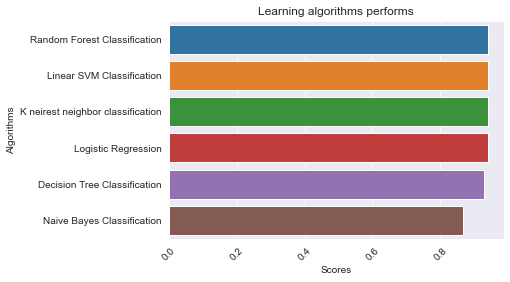

In [168]:
# Visualization part 
sns.barplot(x = 'Scores' , y = 'Algorithms' , data = df_score)
plt.xticks(rotation = 45)
plt.xlabel('Scores')
plt.ylabel('Algorithms')
plt.title('Learning algorithms performs')
plt.show()

## Confusion matrixes

In [169]:
# Logistic Regression predictions
y_pred_lr = lr.predict(X_test)

# Naive bayes predictions 
y_pred_nb = nb.predict(X_test)

# Knn predictions 
y_pred_knn = knn.predict(X_test)

# linear svm predictions 
y_pred_svm = svm.predict(X_test)

# Decision Tree predictions 
y_pred_dt = dt.predict(X_test)

# Random Forest predictions
y_pred_rf = rf.predict(X_test)

# True values 
y_true = y_test

In [170]:
y_pred_knn


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [171]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_pred_lr , y_true)
cm_nb = confusion_matrix(y_pred_nb , y_true)
cm_knn = confusion_matrix(y_pred_knn , y_true)
cm_svm = confusion_matrix(y_pred_svm , y_true)
cm_dt = confusion_matrix(y_pred_dt , y_true)
cm_rf = confusion_matrix(y_pred_rf , y_true)

In [172]:
algorithms = ['Logistic Regression' , 'Naive Bayes Classification' , 'K neirest neighbor classification' , 
              'Linear SVM Classification' , 'Decision Tree Classification' , 'Random Forest Classification']
cm = [cm_lr , cm_nb , cm_knn , cm_svm , cm_dt , cm_rf]

def confmatrix_visiulazation(cm , algorithms):
    for i,j in zip(cm,algorithms):
        plt.figure(figsize=(5,5)) 
        sns.heatmap(i , annot = True , linecolor = 'red' , fmt = '.0f')
        plt.xlabel('y_pred')
        plt.ylabel('y_test')
        plt.title('{} confusion map'.format(j))
        plt.show()

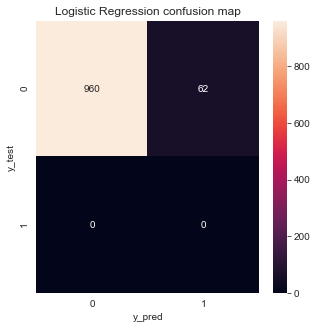

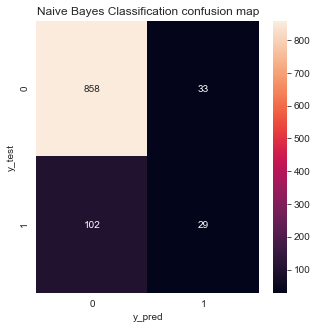

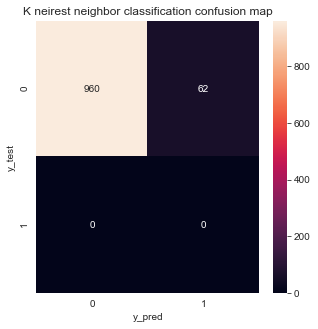

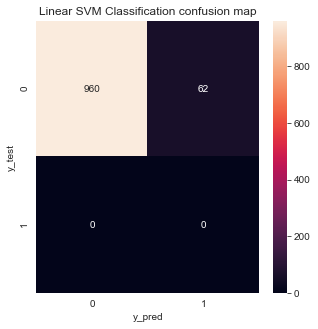

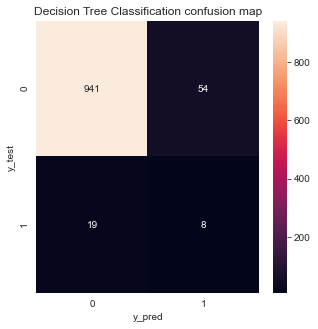

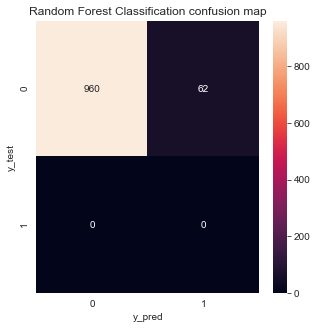

In [173]:
confmatrix_visiulazation(cm , algorithms)